In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
! gdown --id 1AUgWc_fOpb0KmiQ5dBqMupXibhTHkIDk

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1AUgWc_fOpb0KmiQ5dBqMupXibhTHkIDk
To: /content/dota2_chat_messages.csv
100% 818M/818M [00:10<00:00, 75.3MB/s]


In [ ]:
! gdown --id 19-5206vOnq6zHDkIuiY3ceeUXDkZ9qXo

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19-5206vOnq6zHDkIuiY3ceeUXDkZ9qXo
To: /content/expandedLexicon.tsv
100% 209k/209k [00:00<00:00, 46.0MB/s]


In [ ]:
# this is ftlangdetect
!pip install git+https://github.com/zafercavdar/fasttext-langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/zafercavdar/fasttext-langdetect to /tmp/pip-req-build-2obg2wzw
  Running command git clone -q https://github.com/zafercavdar/fasttext-langdetect /tmp/pip-req-build-2obg2wzw
     |████████████████████████████████| 68 kB 2.7 MB/s 
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for fasttext-langdetect: filename=fasttext_langdetect-1.0.3-py3-none-any.whl size=7408 sha256=9e193729744b1470557912a52a1cb8a2f852ace75a140ac2cf5e030e0dbd6d9d
  Stored in directory: /tmp/pip-ephem-wheel-cache-hz682gbv/wheels/a2/df/33/eece8e8bb81b9a71f09624d6c20f6c9296a4df2a40519e0ffd
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=3133784 sha256=b30d311bd7a2048d149a5ad40b5b4c55b0035ec5057570ad73fb5b796443c64c
  Stored in directory: /root/.cache/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully

In [ ]:
# ftlangdetect needs this library
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=68d7a3bfd74b6cf52425fd702958cb21562ad18813271e239a25f627f0cc99c5
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ftlangdetect is the library for detecting language
from ftlangdetect import detect

Exploring and cleaning the data

In [ ]:
df = pd.read_csv('dota2_chat_messages.csv')

In [ ]:
df_lexicon = pd.read_csv('expandedLexicon.tsv', sep = '\t')

In [ ]:
df_lexicon.head()

,term,score
0,horrible_noun,3.679601
1,disgusting_adj,3.493682
2,moron_noun,3.469677
3,bastard_noun,3.399238
4,stupid_noun,3.323882


In [ ]:
def spltr(string):
  word, pos = string.split('_')
  return word
df_lexicon['token'] = df_lexicon.term.apply(spltr)
print(df_lexicon.head())

             term     score       token
0   horrible_noun  3.679601    horrible
1  disgusting_adj  3.493682  disgusting
2      moron_noun  3.469677       moron
3    bastard_noun  3.399238     bastard
4     stupid_noun  3.323882      stupid


In [ ]:
df = df[:1000000]

In [ ]:
df.head()

,match,time,slot,text
0,0,1005.12122,9,ладно гг
1,0,1005.85442,9,изи
2,0,1008.65372,9,од
3,0,1010.51992,9,ебаный
4,0,1013.91912,9,мусор на войде


In [ ]:
df.corr()

,match,time,slot
match,1.000000,0.001413,0.003363
time,0.001413,1.000000,-0.001343
slot,0.003363,-0.001343,1.000000


(array([1.2700e+02, 2.2800e+02, 4.4800e+02, 4.4770e+03, 5.4200e+04,
        6.7044e+04, 3.1284e+04, 3.1968e+04, 3.8462e+04, 4.2880e+04,
        4.6420e+04, 5.2296e+04, 5.7328e+04, 6.2780e+04, 6.9533e+04,
        6.9983e+04, 6.6487e+04, 6.2752e+04, 5.3584e+04, 4.5444e+04,
        4.0005e+04, 2.8969e+04, 2.1656e+04, 1.5787e+04, 1.0700e+04,
        8.1420e+03, 5.4800e+03, 3.6690e+03, 2.5510e+03, 1.8170e+03,
        1.1820e+03, 7.5900e+02, 4.8100e+02, 3.0400e+02, 1.9100e+02,
        1.8000e+02, 1.1900e+02, 7.3000e+01, 4.9000e+01, 4.1000e+01,
        4.9000e+01, 1.3000e+01, 1.4000e+01, 9.0000e+00, 1.5000e+01,
        2.0000e+00, 9.0000e+00, 0.0000e+00, 0.0000e+00, 9.0000e+00]),
 array([-870.168768  , -702.66418864, -535.15960928, -367.65502992,
        -200.15045056,  -32.6458712 ,  134.85870816,  302.36328752,
         469.86786688,  637.37244624,  804.8770256 ,  972.38160496,
        1139.88618432, 1307.39076368, 1474.89534304, 1642.3999224 ,
        1809.90450176, 1977.40908112, 2144.913

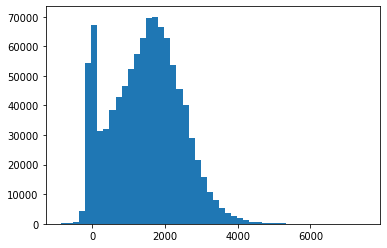

In [ ]:
plt.hist(df['time'], bins = 50)

Learning ftlangdetect and using it for the intention of removing all entries with non-english text

In [ ]:
df.dropna(inplace = True)

In [ ]:
def lang_column(string):
  lang = detect(string)
  lang = lang['lang']
  return lang

In [ ]:
df['lang'] = df['text'].apply(lang_column)

In [ ]:
df[df['lang'].isna()]

,match,time,slot,text,lang


In [ ]:
df = df[df['lang']=='en']

In [ ]:
len(df)

318999

In [ ]:
df.head()

,match,time,slot,text,lang
8,0,1808.40822,9,100%,en
9,1,-131.14018,0,twitch.tv/rage_channel,en
10,1,-121.60481,0,https://www.twitch.tv/rage_channel,en
18,1,700.72893,0,https://www.twitch.tv/rage_channel,en
19,1,702.99503,0,https://www.twitch.tv/rage_channel,en


**Removing unwanted characters **

In [ ]:
df['text'] = df['text'].str.replace(r'\W'," ")

<ipython-input-22-161dff9c06d1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'\W'," ")


In [ ]:
df.head()

,match,time,slot,text,lang
8,0,1808.40822,9,100,en
9,1,-131.14018,0,twitch tv rage_channel,en
10,1,-121.60481,0,https www twitch tv rage_channel,en
18,1,700.72893,0,https www twitch tv rage_channel,en
19,1,702.99503,0,https www twitch tv rage_channel,en


Lexicon

Cells 24-42 were influenced by the Text Sentiment analysis lab

In [ ]:
df_lexicon= df_lexicon.drop_duplicates(subset= ['token'])

In [ ]:
df_lexicon.head(10)

,term,score,token
0,horrible_noun,3.679601,horrible
1,disgusting_adj,3.493682,disgusting
2,moron_noun,3.469677,moron
3,bastard_noun,3.399238,bastard
4,stupid_noun,3.323882,stupid
5,bitch_noun,3.262291,bitch
6,scumbag_noun,3.194918,scumbag
9,ass_noun,3.079980,ass
10,idiot_noun,3.030117,idiot
12,slut_noun,2.930932,slut


In [ ]:
text = df['text'].values
text = [x.lower() for x in text]

In [ ]:
text = [x.split() for x in text]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stops = set(stopwords.words('english'))
print(stops)

{"you've", 'few', 've', "isn't", 'after', 'ours', 'above', 'of', "won't", "you're", 'they', 'me', 'shan', 'yours', 'have', 'down', 'will', 'who', 'now', 'do', 'ma', 'most', 'just', 'couldn', "she's", 'from', 'don', "needn't", 'a', 'by', 'yourself', 'once', 'each', 'to', 'didn', 'hadn', "hadn't", 'all', 'through', 'no', 'other', 'be', 'll', 'while', 'again', "weren't", 'am', 'been', 'the', 'these', 'so', 'than', 'we', 'at', "doesn't", 'him', 'won', 'more', 'whom', 'on', 'm', 'weren', 'against', "hasn't", 'this', 'd', 're', 'did', 'under', "mustn't", "wouldn't", 'then', 'you', 'if', 'in', 'yourselves', 'herself', 'has', 'but', 'why', 'not', "it's", 'only', 'he', 'his', 'themselves', 'into', 'nor', 'that', 'having', 'wasn', 'o', 't', 'theirs', "don't", 'aren', "wasn't", 'when', 'between', 'own', 'further', 'isn', 'hers', 'about', 'wouldn', 'shouldn', 'off', 'there', 'up', 'needn', 'which', 'over', 'before', 'mightn', 'should', 'here', 'any', 'for', 'haven', 'too', 'my', 'your', 'as', 'wer

In [ ]:
to_add = set()
for token in stops:
  if "'" in token:
    to_add.add(token.replace("'", ""))

stops = stops.union(to_add)
len(stops)

204

In [ ]:
sum(len(x) for x in text)

837677

In [ ]:
def remove_stopwords(tokens, stops = stops):
  w = []
  for token in tokens:
    if token not in stops:
      w.append(token)
  return w

text = [remove_stopwords(x) for x in text]

In [ ]:
sum(len(x) for x in text)

602549

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize(tokens):
  w = []
  for token in tokens:
    w.append(lemmatizer.lemmatize(token))
  return w

In [ ]:
text = [lemmatize(x) for x in text]

In [ ]:
lexicon = set(df_lexicon['token'].values)

In [ ]:
def check_lexicon(text = text, lexicon = lexicon):
  w = []
  for word in text:
    #print(word)
    if word in lexicon:
      #print(word)
      w.append(word)
  return w


In [ ]:
text = [check_lexicon(x) for x in text]

In [ ]:
sum(len(x) for x in text)

63072

In [ ]:
def insert_nan(text):
    if len(text) > 0:
      return text
    else:
      return None

In [ ]:
text = [insert_nan(x) for x in text]

In [ ]:
text_series = pd.Series(text)

In [ ]:
text_series

0              None
1              None
2              None
3              None
4              None
            ...    
318994       [game]
318995    [asshole]
318996         None
318997         None
318998      [idiot]
Length: 318999, dtype: object

In [ ]:
text_series_wo_none = text_series.dropna()

In [ ]:
text_series_wo_none

10             [furious]
17               [troll]
24        [fucking, axe]
25                 [axe]
33              [stupid]
               ...      
318991            [game]
318993           [idiot]
318994            [game]
318995         [asshole]
318998           [idiot]
Length: 55302, dtype: object

In [ ]:
len(text_series)

318999

In [ ]:
df['lex_words'] = text_series.values

In [ ]:
df_lex_words = df.dropna()

In [ ]:
def score_creator(list_object, lexicon=df_lexicon):
  points = 0
  for word in list_object:
    # access the word inside the small list
    score = lexicon['score'].loc[lexicon['token'] == word]
    score = score.iloc[0]
    points += score
  return points

In [ ]:
sentiment_scores = [score_creator(x) for x in list(text_series_wo_none)]

In [ ]:
sentiment_scores_series = pd.Series(sentiment_scores)

In [ ]:
df_lex_words['sentiment scores'] = sentiment_scores_series.values

<ipython-input-58-5686c9457b04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lex_words['sentiment scores'] = sentiment_scores_series.values


In [ ]:
df_lex_words

,match,time,slot,text,lang,lex_words,sentiment scores
29,2,1563.18490,0,fast and furious,en,[furious],-1.809810
70,4,92.14417,5,report troll,en,[troll],1.491014
127,6,241.44110,1,fucking reported axe,en,"[fucking, axe]",1.268941
128,6,241.44110,9,why axe is raping me top,en,[axe],-0.815257
137,6,876.45270,1,STUPID,en,[stupid],3.323882
...,...,...,...,...,...,...,...
999991,46005,2595.20950,2,absolutely all game,en,[game],-1.040557
999993,46005,2597.88530,2,You are an idiot,en,[idiot],3.030117
999994,46005,2600.29350,7,in the game,en,[game],-1.040557
999995,46005,2608.12020,7,asshole,en,[asshole],1.813494


In [ ]:
df_lex_words.describe()

,match,time,slot,sentiment scores
count,55302.000000,55302.000000,55302.000000,55302.000000
mean,23129.210101,1462.091604,4.505316,-0.088516
std,13352.323409,953.435405,2.891034,1.971064
min,2.000000,-772.205850,0.000000,-31.349239
25%,11641.000000,750.752367,2.000000,-1.602188
50%,23175.000000,1513.497105,4.000000,-0.623161
75%,34800.000000,2117.544705,7.000000,1.813494
max,46005.000000,6871.840320,9.000000,12.866608


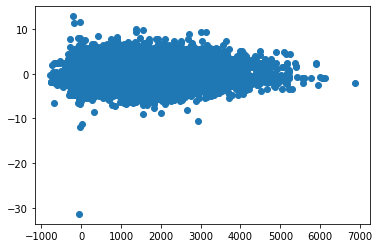

In [ ]:
plt.scatter(df_lex_words['time'],df_lex_words['sentiment scores'])

In [ ]:
print(df_lex_words.corr())

                     match      time      slot  sentiment scores
match             1.000000  0.010986  0.009855         -0.000608
time              0.010986  1.000000 -0.004098          0.005849
slot              0.009855 -0.004098  1.000000         -0.000146
sentiment scores -0.000608  0.005849 -0.000146          1.000000


Predictive model

cells 62-73 are influenced by the linear regression lab

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df_lex_words[['time']]
y = df_lex_words[['sentiment scores']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = .8)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
preds = model.predict(X_test)

In [ ]:
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

Intercept: [-0.09922126]
Slope: [[7.25613819e-06]]


Model Evaluation

In [ ]:
error = y_test - preds

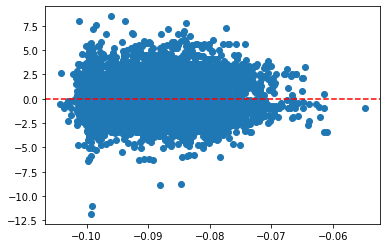

In [ ]:
plt.axhline(y=0, ls='--', c = 'red')
plt.scatter(preds, error)

In [ ]:
error.std()

sentiment scores    1.970919
dtype: float64

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,preds)

9.424798842871951e-05